In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
training_data = pd.read_csv("training_data.csv")

In [44]:
training_data.head(5)

,favorite_count,full_text,hashtags,retweet_count,year,dim1_nominate,dim2_nominate
0,8,b'WATCH my speech on the @SenateFloor to learn...,PatientFreedomAct,3,2017,0.243962,0.170366
1,2,b'Boehner delays leadership races. Only speake...,rossformajoritywhip,3,2015,0.561728,0.089540
2,5,"b""I'll be sharing #scarynumbers about #governm...",scarynumbers governmentspending,4,2014,0.513246,-0.224541
3,34,"b""#OTD in '64, LBJ took important step towards...",OTD,14,2017,-0.241932,0.097843
4,23,b'My bipartisan bill is a step toward protecti...,VA07,7,2020,-0.225722,0.329999


Section A : part a)

In [45]:
df_training = pd.DataFrame(data=training_data)
df_training['text_char_len'] = df_training['full_text'].apply(lambda x: len(x)-3)

for i in range(len(df_training)):
    words = df_training.loc[i, 'full_text'].split()
    if words[0] == "b'": words.pop(0)
    if words[:-1] == "'": words.pop()

    df_training.loc[i, 'text_word_len'] = len(words)

0         20.0
1         10.0
2         20.0
3         20.0
4         41.0
          ... 
333982    26.0
333983    18.0
333984    28.0
333985    18.0
333986    14.0
Name: text_word_len, Length: 333987, dtype: float64

In [48]:
df_training['hashtags']

0                       PatientFreedomAct
1                     rossformajoritywhip
2         scarynumbers governmentspending
3                                     OTD
4                                    VA07
                       ...               
333982               ExpandSocialSecurity
333983                       actonclimate
333984                            climate
333985                       TeleTownHall
333986                  MissouriSpotlight
Name: hashtags, Length: 333987, dtype: object

In [49]:
df_training['hash_char_len'] = df_training['hashtags'].apply(lambda x: len(''.join(x.split())))
df_training['hash_word_len'] = df_training['hashtags'].apply(lambda x: len(x.split()))

0         17
1         19
2         30
3          3
4          4
          ..
333982    20
333983    12
333984     7
333985    12
333986    17
Name: hash_char_len, Length: 333987, dtype: int64

0         1
1         1
2         2
3         1
4         1
         ..
333982    1
333983    1
333984    1
333985    1
333986    1
Name: hash_word_len, Length: 333987, dtype: int64

In [50]:
stats = {
    'text' : {
        'char' : {
                'mini' : df_training['text_char_len'].min(),
                'avg' : df_training['text_char_len'].mean(),
                'med' : df_training['text_char_len'].median(),
                'maxi' : df_training['text_char_len'].max()
        },
        'word' : {
                'mini' : df_training['text_word_len'].min(),
                'avg' : df_training['text_word_len'].mean(),
                'med' : df_training['text_word_len'].median(),
                'maxi' : df_training['text_word_len'].max()
        }
    },
    'hashtag' : {
        'char' : {
                'mini' : df_training['hash_char_len'].min(),
                'avg' : df_training['hash_char_len'].mean(),
                'med' : df_training['hash_char_len'].median(),
                'maxi' : df_training['hash_char_len'].max()
        },
        'word' : {
                'mini' : df_training['hash_word_len'].min(),
                'avg' : df_training['hash_word_len'].mean(),
                'med' : df_training['hash_word_len'].median(),
                'maxi' : df_training['hash_word_len'].max()
        }
    }
}

stats

{'text': {'char': {'mini': 4,
   'avg': 180.17613859222067,
   'med': 151.0,
   'maxi': 2434},
  'word': {'mini': 1.0, 'avg': 24.885510513882277, 'med': 21.0, 'maxi': 61.0}},
 'hashtag': {'char': {'mini': 1,
   'avg': 14.044142436681668,
   'med': 12.0,
   'maxi': 168},
  'word': {'mini': 1, 'avg': 1.4919802267752937, 'med': 1.0, 'maxi': 17}}}

In [51]:
stats_table = pd.DataFrame(columns = ["#char_text", "#word_text","#char_hashtag","#word_hashtag"], index =["Min","Avg","Med","Max"])

In [52]:
for metric, content in stats.items():
    for length_type, value in content.items():
        for stat, magnitude in value.items():
            index_map = {
                'mini' : 'Min',
                'avg' :'Avg',
                'med' : 'Med',
                'maxi' : 'Max'
            }
            column = f"#{length_type}_{metric}"
            index = index_map[stat]
            
            stats_table.loc[index,column] = magnitude
            
stats_table

,#char_text,#word_text,#char_hashtag,#word_hashtag
Min,4,1.0,1,1
Avg,180.176139,24.885511,14.044142,1.49198
Med,151.0,21.0,12.0,1.0
Max,2434,61.0,168,17


Section A : part b)

In [53]:
hashtags = {}

for i in range(len(df_training)):
    tags = df_training.loc[i, 'hashtags'].split()
    for tag in tags:
        hashtags[tag] = hashtags.get(tag, 1) + 1

sorted_hashtags_desc = dict(sorted(hashtags.items(), key=lambda item: item[1], reverse=True))

top_10_hashtags = list(sorted_hashtags_desc.keys())[0:10]

top_10_hashtags

['COVID19',
 'tcot',
 'SOTU',
 'Obamacare',
 'utpol',
 'coronavirus',
 'ForThePeople',
 'ACA',
 'ProtectOurCare',
 '4jobs']

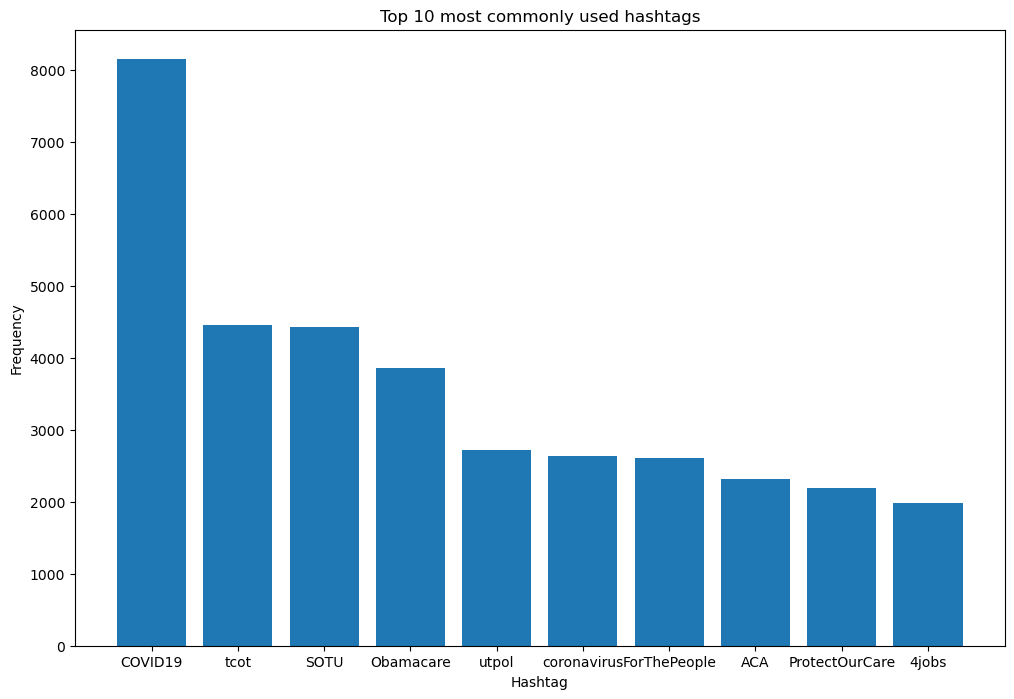

In [62]:
plt.figure(figsize = (12,8))
plt.bar(top_10_hashtags, list(sorted_hashtags_desc.values())[0:10])
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.title('Top 10 most commonly used hashtags')
plt.show()

Do you observe any
patterns? What are the meanings / interpretations of the hashtags you have identified?

Section A : part c)

In [67]:
df_training_group_1 = df_training[(df_training['dim1_nominate'] > 0) & (df_training['dim2_nominate'] > 0)].reset_index()
df_training_group_2 = df_training[(df_training['dim1_nominate'] > 0) & (df_training['dim2_nominate'] < 0)].reset_index()
df_training_group_3 = df_training[(df_training['dim1_nominate'] < 0) & (df_training['dim2_nominate'] > 0)].reset_index()
df_training_group_4 = df_training[(df_training['dim1_nominate'] < 0) & (df_training['dim2_nominate'] < 0)].reset_index()

In [69]:
hashtags_group_1 = {}

for i in range(len(df_training_group_1)):
    tags = df_training_group_1.loc[i, 'hashtags'].split()
    for tag in tags:
        hashtags_group_1[tag] = hashtags_group_1.get(tag, 1) + 1

sorted_hashtags_group_1_desc = dict(sorted(hashtags_group_1.items(), key=lambda item: item[1], reverse=True))

top_10_hashtags_group_1 = list(sorted_hashtags_group_1_desc.keys())[0:10]

top_10_hashtags_group_1

['tcot',
 'Obamacare',
 'COVID19',
 'SOTU',
 'TaxReform',
 'utpol',
 'AR3',
 'taxreform',
 '4jobs',
 'USMCA']

In [70]:
hashtags_group_2 = {}

for i in range(len(df_training_group_2)):
    tags = df_training_group_2.loc[i, 'hashtags'].split()
    for tag in tags:
        hashtags_group_2[tag] = hashtags_group_2.get(tag, 1) + 1

sorted_hashtags_group_2_desc = dict(sorted(hashtags_group_2.items(), key=lambda item: item[1], reverse=True))

top_10_hashtags_group_2 = list(sorted_hashtags_group_2_desc.keys())[0:10]

top_10_hashtags_group_2

['IA03',
 'Obamacare',
 'tcot',
 'NY22',
 'COVID19',
 'SouthJersey',
 '4jobs',
 'SOTU',
 'NY24',
 'VA05']

In [71]:
hashtags_group_3 = {}

for i in range(len(df_training_group_3)):
    tags = df_training_group_3.loc[i, 'hashtags'].split()
    for tag in tags:
        hashtags_group_3[tag] = hashtags_group_3.get(tag, 1) + 1

sorted_hashtags_group_3_desc = dict(sorted(hashtags_group_3.items(), key=lambda item: item[1], reverse=True))

top_10_hashtags_group_3 = list(sorted_hashtags_group_3_desc.keys())[0:10]

top_10_hashtags_group_3

['COVID19',
 'utpol',
 'mtpol',
 'ForThePeople',
 'VA07',
 'ProtectOurCare',
 'ACA',
 'FL07',
 'coronavirus',
 'FlaPol']

In [72]:
hashtags_group_4 = {}

for i in range(len(df_training_group_4)):
    tags = df_training_group_4.loc[i, 'hashtags'].split()
    for tag in tags:
        hashtags_group_4[tag] = hashtags_group_4.get(tag, 1) + 1

sorted_hashtags_group_4_desc = dict(sorted(hashtags_group_4.items(), key=lambda item: item[1], reverse=True))

top_10_hashtags_group_4 = list(sorted_hashtags_group_4_desc.keys())[0:10]

top_10_hashtags_group_4

['COVID19',
 'GOPTaxScam',
 'ForThePeople',
 'ACA',
 'ProtectOurCare',
 'SOTU',
 'NetNeutrality',
 'Trumpcare',
 'DACA',
 'ActOnClimate']

C:\Users\91989\AppData\Local\Temp\ipykernel_18700\3350923228.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,0].set_xticklabels(top_10_hashtags_group_1, rotation=45)
C:\Users\91989\AppData\Local\Temp\ipykernel_18700\3350923228.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,1].set_xticklabels(top_10_hashtags_group_2, rotation=45)
C:\Users\91989\AppData\Local\Temp\ipykernel_18700\3350923228.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,0].set_xticklabels(top_10_hashtags_group_3, rotation=45)
C:\Users\91989\AppData\Local\Temp\ipykernel_18700\3350923228.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,1].set_xticklabels(top_10_hashtags_group_4, rotation=45)
C:\Users\91989\AppData\Local\Temp\ipykernel_18700\3350923228.py:23: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodat

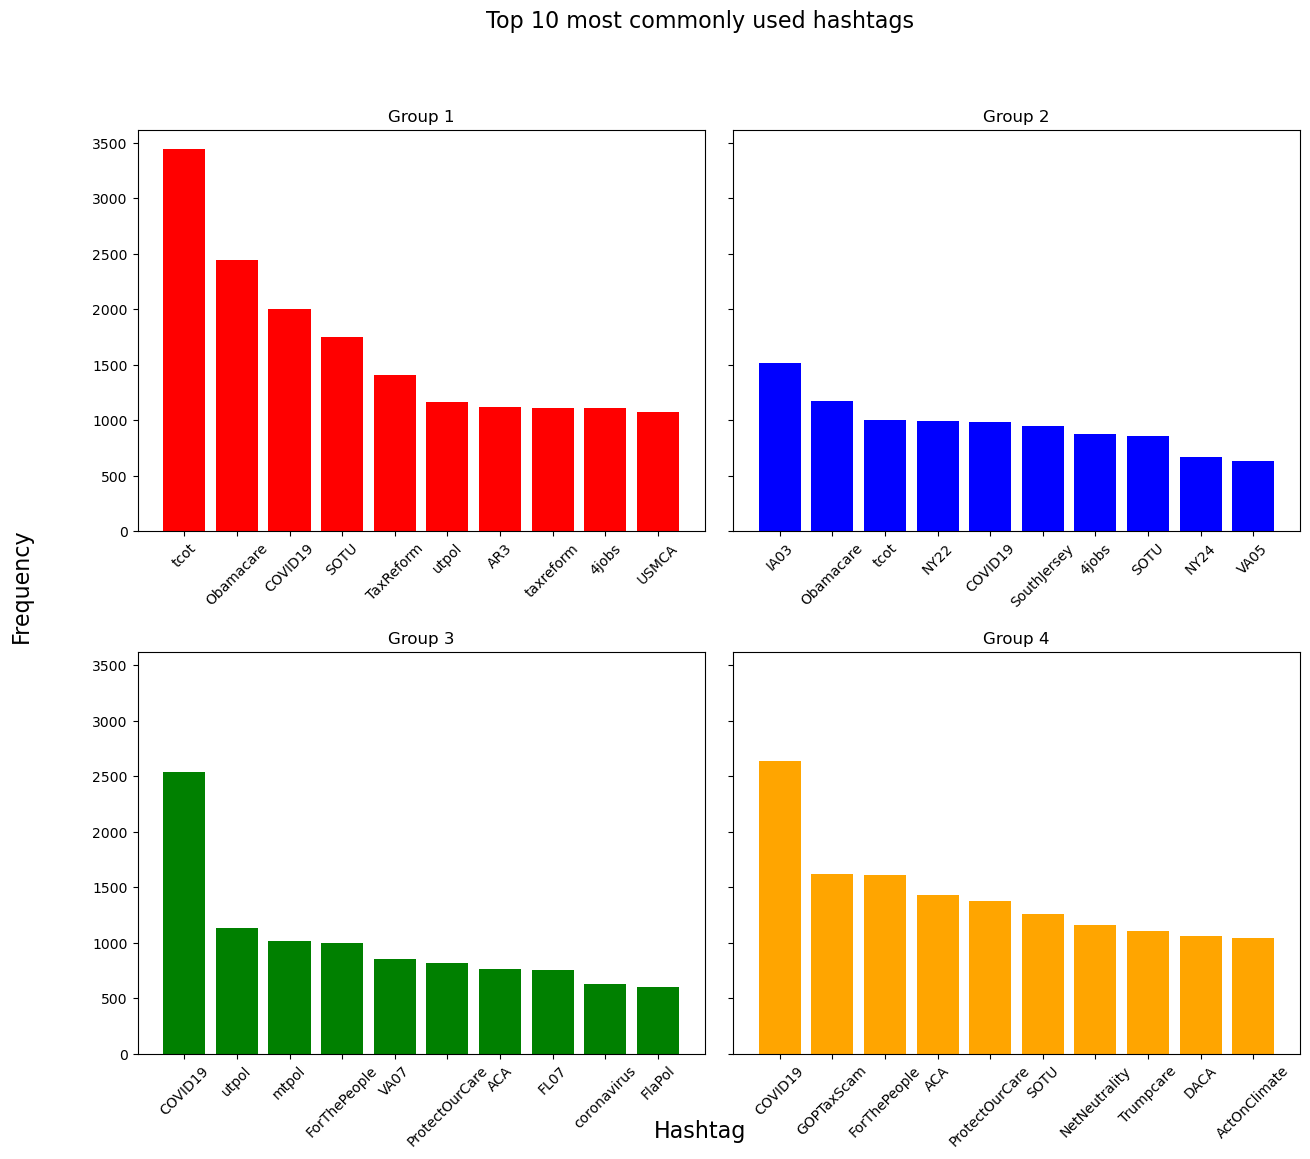

In [102]:
fig, axs = plt.subplots(2, 2, sharey = True, figsize=(15,12))

axs[0,0].bar(top_10_hashtags_group_1, list(sorted_hashtags_group_1_desc.values())[0:10], color='red') 
axs[0,0].set_title('Group 1')
axs[0,0].set_xticklabels(top_10_hashtags_group_1, rotation=45)

axs[0,1].bar(top_10_hashtags_group_2, list(sorted_hashtags_group_2_desc.values())[0:10], color='blue') 
axs[0,1].set_title('Group 2')
axs[0,1].set_xticklabels(top_10_hashtags_group_2, rotation=45)

axs[1,0].bar(top_10_hashtags_group_3, list(sorted_hashtags_group_3_desc.values())[0:10], color='green') 
axs[1,0].set_title('Group 3')
axs[1,0].set_xticklabels(top_10_hashtags_group_3, rotation=45)

axs[1,1].bar(top_10_hashtags_group_4, list(sorted_hashtags_group_4_desc.values())[0:10], color='orange') 
axs[1,1].set_title('Group 4')
axs[1,1].set_xticklabels(top_10_hashtags_group_4, rotation=45)

fig.text(0.5, 0.04, 'Hashtag', ha='center', fontsize=16)
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=16)
fig.suptitle('Top 10 most commonly used hashtags', fontsize=16)

plt.tight_layout(rect=[0.2,0.5,0.3,0.7])
plt.subplots_adjust(wspace=0.05, hspace=0.3)

Do you observe any patterns? Are your findings similar to or
different from your findings in part b) ?. Please explain.

Section A : part d)

section A : part e)